<a href="https://colab.research.google.com/github/nwidyant9/G-Dash/blob/main/linreg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pickle
import joblib

In [2]:
data_path = 'https://raw.githubusercontent.com/nwidyant9/Project00/main/dummy.csv'

In [3]:
dset = pd.read_csv(data_path)

In [4]:
dset.head(15)

,Bulan,Code,Mesin,Load_time,Freq,Menit,Target
0,2023-01-01,44927DGM 3,DGM 3,2756.816667,5.0,24.950000,0.015
1,2023-01-01,44927DGM 2 (KORAN),DGM 2 (KORAN),NaN,NaN,NaN,NaN
2,2023-01-01,44927,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,44927DGM 1,DGM 1,14434.450000,12.0,252.950000,0.020
4,2023-01-01,44927DGM 2,DGM 2,NaN,NaN,NaN,0.020
5,2023-01-01,44927GOSS 546,GOSS 546,NaN,NaN,NaN,0.035
6,2023-01-01,44927SOLNA 578,SOLNA 578,17466.383333,20.0,386.833333,0.020
7,2023-01-01,44927SOLNA 301,SOLNA 301,21371.566667,18.0,758.183333,0.030
8,2023-01-01,44927SOLNA 630 L1,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030
9,2023-01-01,44927SOLNA 630 L2,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030


In [5]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bulan      66 non-null     object 
 1   Code       66 non-null     object 
 2   Mesin      60 non-null     object 
 3   Load_time  44 non-null     float64
 4   Freq       43 non-null     float64
 5   Menit      43 non-null     float64
 6   Target     52 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.7+ KB


In [6]:
dset = dset.drop(['Bulan', 'Code'], axis=1)

In [7]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target
0,DGM 3,2756.816667,5.0,24.950000,0.015
1,DGM 2 (KORAN),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,DGM 1,14434.450000,12.0,252.950000,0.020
4,DGM 2,NaN,NaN,NaN,0.020
5,GOSS 546,NaN,NaN,NaN,0.035
6,SOLNA 578,17466.383333,20.0,386.833333,0.020
7,SOLNA 301,21371.566667,18.0,758.183333,0.030
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030


In [8]:
dset['BD_percent'] = dset['Menit'] / dset['Load_time']

In [9]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target,BD_percent
0,DGM 3,2756.816667,5.0,24.950000,0.015,0.009050
1,DGM 2 (KORAN),NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,DGM 1,14434.450000,12.0,252.950000,0.020,0.017524
4,DGM 2,NaN,NaN,NaN,0.020,NaN
5,GOSS 546,NaN,NaN,NaN,0.035,NaN
6,SOLNA 578,17466.383333,20.0,386.833333,0.020,0.022147
7,SOLNA 301,21371.566667,18.0,758.183333,0.030,0.035476
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030,0.050521
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030,0.068877


In [10]:
dset = dset.dropna()

In [11]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target,BD_percent
0,DGM 3,2756.816667,5.0,24.950000,0.015,0.009050
3,DGM 1,14434.450000,12.0,252.950000,0.020,0.017524
6,SOLNA 578,17466.383333,20.0,386.833333,0.020,0.022147
7,SOLNA 301,21371.566667,18.0,758.183333,0.030,0.035476
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030,0.050521
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030,0.068877
11,DGM 3,2643.233333,7.0,105.150000,0.015,0.039781
14,DGM 1,10345.233333,7.0,123.983333,0.020,0.011985
15,DGM 2,1743.816667,2.0,68.933333,0.020,0.039530
17,SOLNA 578,15996.883333,4.0,61.933333,0.020,0.003872


In [12]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 65
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mesin       43 non-null     object 
 1   Load_time   43 non-null     float64
 2   Freq        43 non-null     float64
 3   Menit       43 non-null     float64
 4   Target      43 non-null     float64
 5   BD_percent  43 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [13]:
dset['Mesin'].value_counts()

DGM 3           6
DGM 1           6
SOLNA 301       6
SOLNA 578       5
SOLNA 630 L1    5
SOLNA 630 L2    5
SOLNA 630 L3    4
DGM 2           3
GOSS 546        3
Name: Mesin, dtype: int64

In [14]:
dset = dset.drop(['Mesin', 'Target'], axis=1)

In [15]:
dset.head(15)

,Load_time,Freq,Menit,BD_percent
0,2756.816667,5.0,24.950000,0.009050
3,14434.450000,12.0,252.950000,0.017524
6,17466.383333,20.0,386.833333,0.022147
7,21371.566667,18.0,758.183333,0.035476
8,2107.383333,3.0,106.466667,0.050521
9,4487.216667,11.0,309.066667,0.068877
11,2643.233333,7.0,105.150000,0.039781
14,10345.233333,7.0,123.983333,0.011985
15,1743.816667,2.0,68.933333,0.039530
17,15996.883333,4.0,61.933333,0.003872


In [16]:
#scaler = MinMaxScaler()
#norm_dset = scaler.fit_transform(dset)

In [17]:
#norm_dset = pd.DataFrame(norm_dset, columns=dset.columns)

In [18]:
#norm_dset.head(15)

,Load_time,Freq,Menit,BD_percent
0,0.081575,0.058824,0.000000,0.030139
1,0.563262,0.161765,0.130358,0.079455
2,0.688325,0.279412,0.206905,0.106362
3,0.849409,0.250000,0.419222,0.183934
4,0.054787,0.029412,0.046607,0.271490
5,0.152952,0.147059,0.162442,0.378321
6,0.076890,0.088235,0.045854,0.208986
7,0.394587,0.088235,0.056622,0.047216
8,0.039791,0.014706,0.025147,0.207527
9,0.627710,0.044118,0.021145,0.000000


In [16]:
x = dset[['Load_time', 'Freq', 'Menit']]
y = dset['BD_percent']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

MODEL 1

In [68]:
model = LinearRegression()

In [69]:
model.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(x_test)

In [71]:
print(x_test)

       Load_time  Freq       Menit
51  23397.600000  32.0  953.916667
40  14332.483333  15.0  429.750000
43   6593.866667  12.0  390.900000
55   2681.816667   5.0   46.983333
15   1743.816667   2.0   68.933333
39   7045.516667  19.0  824.133333
27    809.700000   1.0   30.916667
17  15996.883333   4.0   61.933333
36   9219.133333   4.0   59.866667


In [72]:
print(y_test)

51    0.040770
40    0.029984
43    0.059282
55    0.017519
15    0.039530
39    0.116973
27    0.038183
17    0.003872
36    0.006494
Name: BD_percent, dtype: float64


In [73]:
print("Prediction values:", y_pred)

Prediction values: [ 0.02956011  0.02837509  0.06042418  0.04711551  0.05619263  0.09818746
  0.05709496 -0.0080156   0.02109231]


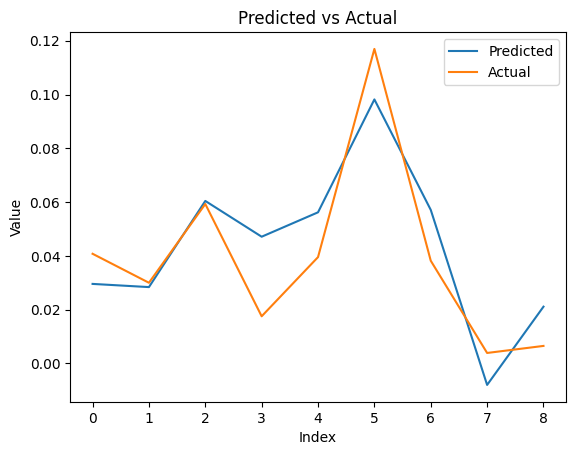

In [74]:
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [75]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.00026090083807351987


In [84]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.01615242514526905


In [76]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7482808645150547


In [87]:
# Menyimpan model ke dalam file pickle
with open('regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [89]:
joblib.dump(model, 'lr_model.pkl')

['lr_model.pkl']

In [93]:
# Memuat model dari file pickle
with open('regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [96]:
new_data_point = [[4, 5, 7]]

In [97]:
# Melakukan prediksi menggunakan model yang telah dimuat
prediction = loaded_model.predict(new_data_point)
print(f'Prediction: {prediction[0]:.2f}')

Prediction: 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
